In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

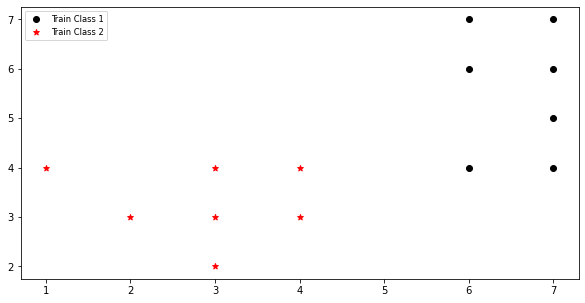

In [2]:
#read the file
traindata = pd.read_csv('D:/All Videos and Lectures of 4.2/Pattern Lab/Lab 5/train_knn.txt', sep=",",header=None)
traindata=traindata.to_numpy()
#if the class value is 1 then store it in class 1 else class 2
class1=[[x[0],x[1]] for x in traindata if x[2]==1]
class2=[[x[0],x[1]] for x in traindata if x[2]==2]
class1 = np.array(class1)
class2 = np.array(class2)
#plot the training data
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)
ax.scatter(class1[:,0],class1[:,1],marker='o',color='k',label='Train Class 1')
ax.scatter(class2[:,0],class2[:,1],marker='*',color='r',label='Train Class 2')
legend = ax.legend(loc='upper left', shadow=False, fontsize='small',labelspacing=0.5)
legend.get_frame().set_facecolor('None')
plt.show()

In [3]:
testdata = pd.read_csv('D:/All Videos and Lectures of 4.2/Pattern Lab/Lab 5/test_knn.txt', sep=",",header=None)
testdata=testdata.to_numpy()

In [4]:
distances = []
prediction_list = []
final_dis = []
k = int(input())
for i in testdata:
    predicted = 5
    count1 = 0
    count2 = 0
    for j in traindata:
        dis = math.sqrt(((i[0] - j[0]) **2) + ((i[1] - j[1]) **2))
        distances.append([dis,j[2]])
    distances.sort(key = lambda x: x[0])
    for u in distances[:k]:
        if(u[1] == 1):
            count1 = count1 + 1
        else:
            count2 = count2 + 1
    if(count1 > count2):
        predicted = 1
    else:
        predicted = 2
    
    distances.insert(k,[i[0],i[1]])
    print(distances[:k])
    final_dis.append(distances[:k+1])
    
    prediction_list.append([i[0],i[1],predicted])
    distances = []

prediction_list

5
[[3.0, 1], [3.0, 2], [3.1622776601683795, 1], [3.1622776601683795, 2], [3.605551275463989, 2]]
[[0.0, 1], [1.0, 1], [1.0, 1], [1.4142135623730951, 1], [2.0, 1]]
[[0.0, 2], [1.0, 2], [1.0, 2], [1.4142135623730951, 2], [1.4142135623730951, 2]]
[[4.123105625617661, 1], [4.123105625617661, 2], [4.123105625617661, 2], [4.47213595499958, 1], [4.47213595499958, 2]]
[[1.0, 2], [1.4142135623730951, 2], [2.0, 2], [2.23606797749979, 2], [2.23606797749979, 2]]
[[1.4142135623730951, 2], [2.0, 2], [2.0, 2], [2.23606797749979, 2], [2.8284271247461903, 2]]
[[2.23606797749979, 1], [2.8284271247461903, 1], [3.1622776601683795, 1], [3.605551275463989, 1], [4.0, 2]]
[[1.4142135623730951, 1], [2.23606797749979, 1], [2.23606797749979, 1], [3.1622776601683795, 1], [3.605551275463989, 1]]
[[1.0, 1], [1.4142135623730951, 1], [2.0, 1], [2.23606797749979, 1], [2.8284271247461903, 1]]


[[3, 7, 2],
 [7, 7, 1],
 [4, 3, 2],
 [2, 8, 2],
 [3, 5, 2],
 [1, 2, 2],
 [4, 8, 1],
 [8, 3, 1],
 [8, 4, 1]]

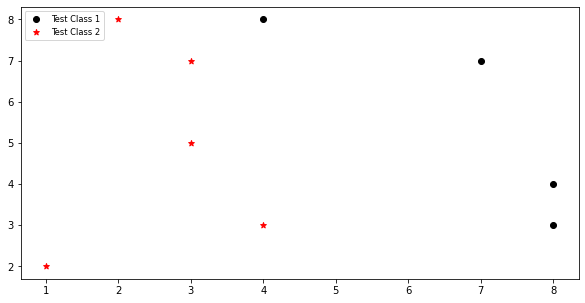

In [5]:
class1=[[x[0],x[1]] for x in prediction_list if x[2]==1]
class2=[[x[0],x[1]] for x in prediction_list if x[2]==2]
class1 = np.array(class1)
class2 = np.array(class2)

f, ax = plt.subplots()
f.set_figheight(5)
f.set_figwidth(10)
ax.scatter(class1[:,0],class1[:,1],marker='o',color='k',label='Test Class 1')
ax.scatter(class2[:,0],class2[:,1],marker='*',color='r',label='Test Class 2')
legend = ax.legend(loc='upper left', shadow=False, fontsize='small',labelspacing=0.5)
legend.get_frame().set_facecolor('None')
plt.show()

In [6]:
prediction = open('D:/All Videos and Lectures of 4.2/Pattern Lab/Lab 5/prediction.txt','w')
for j in (final_dis):
    predicted = ''
    count1 = 0
    count2 = 0
    print(j[len(j)-1])
    stest = str(j[len(j)-1])+'\n'
    prediction.write(stest)
    n =1
    for u in j[:-1]:
        print('Distance ',n,':',u[0],'\tClass',u[1])
        sdis = 'Distance '+ str(n)+ ':'+ str( u[0] ) +'\tClass'+str(u[1])+'\n'
        prediction.write(sdis)
        if(u[1] == 1):
            count1 = count1 + 1
        else:
            count2 = count2 + 1
        n+=1
    if(count1 > count2):
        predicted = 'Class 1'
    else:
        predicted = 'Class 2'
    print('Predicted Class: ',predicted,'\n')
    spredict = 'Predicted Class: '+str(predicted)+'\n'
    prediction.write(spredict)
prediction.close()

[3, 7]
Distance  1 : 3.0 	Class 1
Distance  2 : 3.0 	Class 2
Distance  3 : 3.1622776601683795 	Class 1
Distance  4 : 3.1622776601683795 	Class 2
Distance  5 : 3.605551275463989 	Class 2
Predicted Class:  Class 2 

[7, 7]
Distance  1 : 0.0 	Class 1
Distance  2 : 1.0 	Class 1
Distance  3 : 1.0 	Class 1
Distance  4 : 1.4142135623730951 	Class 1
Distance  5 : 2.0 	Class 1
Predicted Class:  Class 1 

[4, 3]
Distance  1 : 0.0 	Class 2
Distance  2 : 1.0 	Class 2
Distance  3 : 1.0 	Class 2
Distance  4 : 1.4142135623730951 	Class 2
Distance  5 : 1.4142135623730951 	Class 2
Predicted Class:  Class 2 

[2, 8]
Distance  1 : 4.123105625617661 	Class 1
Distance  2 : 4.123105625617661 	Class 2
Distance  3 : 4.123105625617661 	Class 2
Distance  4 : 4.47213595499958 	Class 1
Distance  5 : 4.47213595499958 	Class 2
Predicted Class:  Class 2 

[3, 5]
Distance  1 : 1.0 	Class 2
Distance  2 : 1.4142135623730951 	Class 2
Distance  3 : 2.0 	Class 2
Distance  4 : 2.23606797749979 	Class 2
Distance  5 : 2.2360